# Credit Risk Prediction

## Load and read data

In [1]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./data/german_credit_data.csv", index_col=0)
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


Check for null values

In [4]:
df.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64


## Exploratory Data Analysis

In [6]:
import plotly.offline as py 
py.init_notebook_mode(connected=True) # this code, allow us to work with offline plotly version
import plotly.graph_objs as go # it's like "plt" of matplot
import plotly.tools as tls # It's useful to we get some tools of plotly
import warnings # This library will be used to ignore some warnings
from collections import Counter # To do counter of some features

### Target Variable Distribution

In [7]:
trace0 = go.Bar(
            x = df[df["Risk"]== 'good']["Risk"].value_counts().index.values,
            y = df[df["Risk"]== 'good']["Risk"].value_counts().values,
            name='Good credit'
    )
trace1 = go.Bar(
            x = df[df["Risk"]== 'bad']["Risk"].value_counts().index.values,
            y = df[df["Risk"]== 'bad']["Risk"].value_counts().values,
            name='Bad credit'
    )

data = [trace0, trace1]
layout = go.Layout(
    yaxis=dict(
        title='Count'
    ),
    xaxis=dict(
        title='Risk Variable'
    ),
    title='Target variable distribution'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bar')
# fig.show()

## Data  Preprocessing & Feature Engineering

#### Changing age to categorical variable

In [5]:
#Let's look the Credit Amount column
interval = (18, 25, 35, 60, 120)

cats = ['Student', 'Young', 'Adult', 'Senior']
df["Age_cat"] = pd.cut(df.Age, interval, labels=cats)

In [6]:
print("Purpose : ",df.Purpose.unique())
print("Sex : ",df.Sex.unique())
print("Housing : ",df.Housing.unique())
print("Saving accounts : ",df['Saving accounts'].unique())
print("Risk : ",df['Risk'].unique())
print("Checking account : ",df['Checking account'].unique())
print("Age_cat : ",df['Age_cat'].unique())

Purpose :  ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']
Sex :  ['male' 'female']
Housing :  ['own' 'free' 'rent']
Saving accounts :  [nan 'little' 'quite rich' 'rich' 'moderate']
Risk :  ['good' 'bad']
Checking account :  ['little' 'moderate' nan 'rich']
Age_cat :  ['Senior', 'Student', 'Adult', 'Young']
Categories (4, object): ['Student' < 'Young' < 'Adult' < 'Senior']


#### One-hot Encoding

In [7]:
def one_hot_encoder(df, nan_as_category = False):
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns= categorical_columns, dummy_na= nan_as_category, drop_first=True)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns

In [8]:
df['Saving accounts'] = df['Saving accounts'].fillna('no_inf')
df['Checking account'] = df['Checking account'].fillna('no_inf')

#Purpose to Dummies Variable
df = df.merge(pd.get_dummies(df.Purpose, drop_first=True, prefix='Purpose'), left_index=True, right_index=True)
#Sex feature in dummies
df = df.merge(pd.get_dummies(df.Sex, drop_first=True, prefix='Sex'), left_index=True, right_index=True)
# Housing get dummies
df = df.merge(pd.get_dummies(df.Housing, drop_first=True, prefix='Housing'), left_index=True, right_index=True)
# Housing get Saving Accounts
df = df.merge(pd.get_dummies(df["Saving accounts"], drop_first=True, prefix='Savings'), left_index=True, right_index=True)
# Housing get Risk
df = df.merge(pd.get_dummies(df.Risk, prefix='Risk'), left_index=True, right_index=True)
# Housing get Checking Account
df = df.merge(pd.get_dummies(df["Checking account"], drop_first=True, prefix='Check'), left_index=True, right_index=True)
# Housing get Age categorical
df = df.merge(pd.get_dummies(df["Age_cat"], drop_first=True, prefix='Age_cat'), left_index=True, right_index=True)

In [9]:
#Excluding the missing columns
del df["Saving accounts"]
del df["Checking account"]
del df["Purpose"]
del df["Sex"]
del df["Housing"]
del df["Age_cat"]
del df["Risk"]
del df['Risk_good']
del df["Age"]

#### Normalising Data

In [11]:
df['Credit amount'] = np.log(df['Credit amount'])

In [12]:
df.head()

,Job,Credit amount,Duration,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,...,Savings_no_inf,Savings_quite rich,Savings_rich,Risk_bad,Check_moderate,Check_no_inf,Check_rich,Age_cat_Young,Age_cat_Adult,Age_cat_Senior
0,2,7.063904,6,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
1,2,8.691315,48,0,0,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
2,1,7.647786,12,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,2,8.972337,42,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2,8.490849,24,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


## Correlation

In [ ]:
plt.figure(figsize=(14,12))
# sns.heatmap(df.astype(float).corr(),linewidths=0.1,vmax=1.0, 
#             square=True,  linecolor='white', annot=True)
sns.heatmap(df.astype(float).corr(), linewidths=0.1, vmax=1.0, square=True, linecolor='white', annot=True, fmt=".2f", cmap="BuPu")
# sns.heatmap(df.astype(float).corr(), linewidths=0.1, vmax=1.0, square=True, linecolor='white', annot=True, fmt=".2f")
# sns.heatmap(df.astype(float).corr(), cmap="BuPu")
plt.show()

## Modelling

In [14]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score # to split the data
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score #To evaluate our model

from sklearn.model_selection import GridSearchCV

# Algorithmns models to be compared
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# from xgboost import XGBClassifier

In [15]:
#Creating the X and y variables
X = df.drop(labels=["Risk_bad"], axis=1).values
y = df["Risk_bad"].values

# Spliting X and y into train and test version
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

LR: 0.397229 (0.098755)
LDA: 0.430765 (0.084271)
KNN: 0.377204 (0.097358)
CART: 0.523355 (0.093079)
NB: 0.602460 (0.072459)
RF: 0.382760 (0.071527)
SVM: 0.144681 (0.074980)


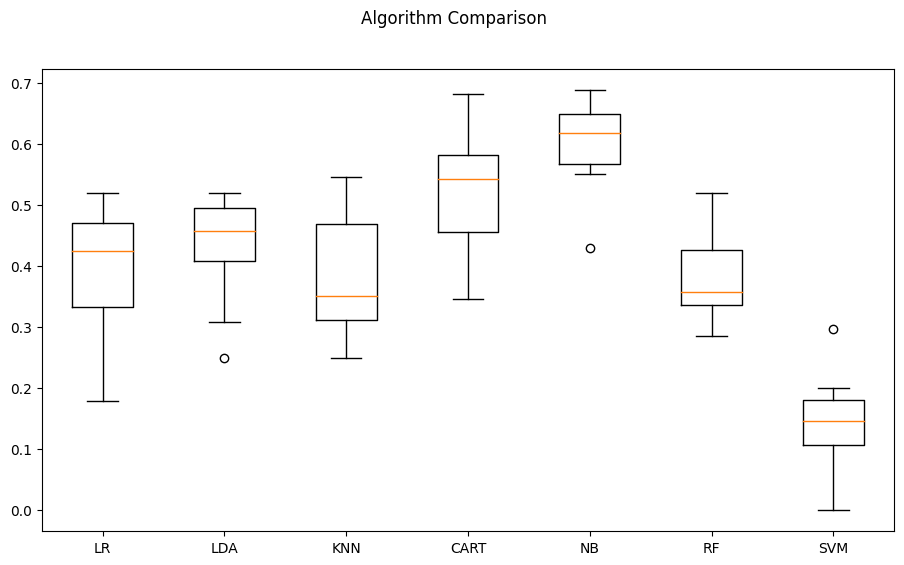

In [21]:
# to feed the random state
seed = 7

# prepare models
models = []
models.append(('LR', LogisticRegression(max_iter=500))) # LR was not converging with max_iter=100
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC(gamma='auto')))
# models.append(('XGB', XGBClassifier()))

# evaluate each model in turn
results = []
names = []
scoring = 'recall'

for name, model in models:
        kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
# boxplot algorithm comparison
fig = plt.figure(figsize=(11,6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Decision Tree

In [25]:
decision_tree_parameters = {'criterion':['gini','entropy'],'max_depth': np.arange(1,15), 'min_samples_leaf': np.arange(1,15), 'min_samples_split': np.arange(2, 10)}
decision_tree_grid = GridSearchCV(DecisionTreeClassifier(), param_grid=decision_tree_parameters, cv=10)
decision_tree_grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [32]:
dtc_best_params = decision_tree_grid.best_params_
dtc_best_params

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 10,
 'min_samples_split': 6}

In [27]:
decision_tree_grid.best_score_

0.744

In [30]:
dtc_criterion = dtc_best_params["criterion"]
dtc_max_depth = dtc_best_params["max_depth"]
dtc_min_samples_leaf = dtc_best_params["min_samples_leaf"]
dtc_min_sample_split = dtc_best_params["min_samples_split"]

In [34]:
decision_tree_clf = DecisionTreeClassifier(criterion=dtc_criterion, max_depth=dtc_max_depth, min_samples_leaf=dtc_min_samples_leaf, min_samples_split=dtc_min_sample_split)
decision_tree_clf.fit(X_train, y_train)
y_pred = decision_tree_clf.predict(X_test)

In [40]:
from sklearn.metrics import confusion_matrix, classification_report
decision_tree_score = classification_report(y_test, y_pred)
print(decision_tree_score)
print("Decision Tree Accuracy:", decision_tree_clf.score(X_test, y_test))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       178
           1       0.60      0.39      0.47        72

    accuracy                           0.75       250
   macro avg       0.69      0.64      0.65       250
weighted avg       0.73      0.75      0.73       250

Decision Tree Accuracy: 0.748


### Gaussian Naive Bayes Model

In [ ]:
from sklearn.utils import resample
from sklearn.metrics import roc_curve

GNB = GaussianNB()

# Fitting with train data
model = GNB.fit(X_train, y_train)

print("Primitive error evaluation accuracy score: ", model.score(X_train, y_train))

y_pred = model.predict(X_test)

print("Test predict accuracy score: ", accuracy_score(y_test,y_pred),"\n")

print("Confussion Matrix: \n", confusion_matrix(y_test, y_pred),"\n")

print("Classification report according to Test prediction: \n", classification_report(y_test, y_pred))

#### ROC for predictability

In [ ]:
#Predicting proba
y_pred_prob = model.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate', color="r")
plt.ylabel('True Positive Rate', color="g")
plt.title('ROC Curve')
plt.show()